# Title: 
### Utilizing OpenAI's GPT-3 for Sentiment Analysis of Restaurant Reviews

AUTHORS: NIK BEAR BROWN, RISHABH INDORIA 

# Introduction:
Sentiment analysis is a rapidly growing field, with the increasing demand for understanding and analyzing customer opinions and emotions. Artificial intelligence (AI) has proven to be a valuable tool in this field, and OpenAI's GPT-3 (Generative Pretrained Transformer 3) is one of the most advanced AI models currently available. This study aims to evaluate the performance of GPT-3 for sentiment analysis of restuarant reviews.

# Methodology:
The study utilized the GPT-3 model fine-tuned for sentiment analysis. The model was applied to a dataset of restaurant reviews collected from various websites, and the sentiment of each review was analyzed and categorized as positive or negative.


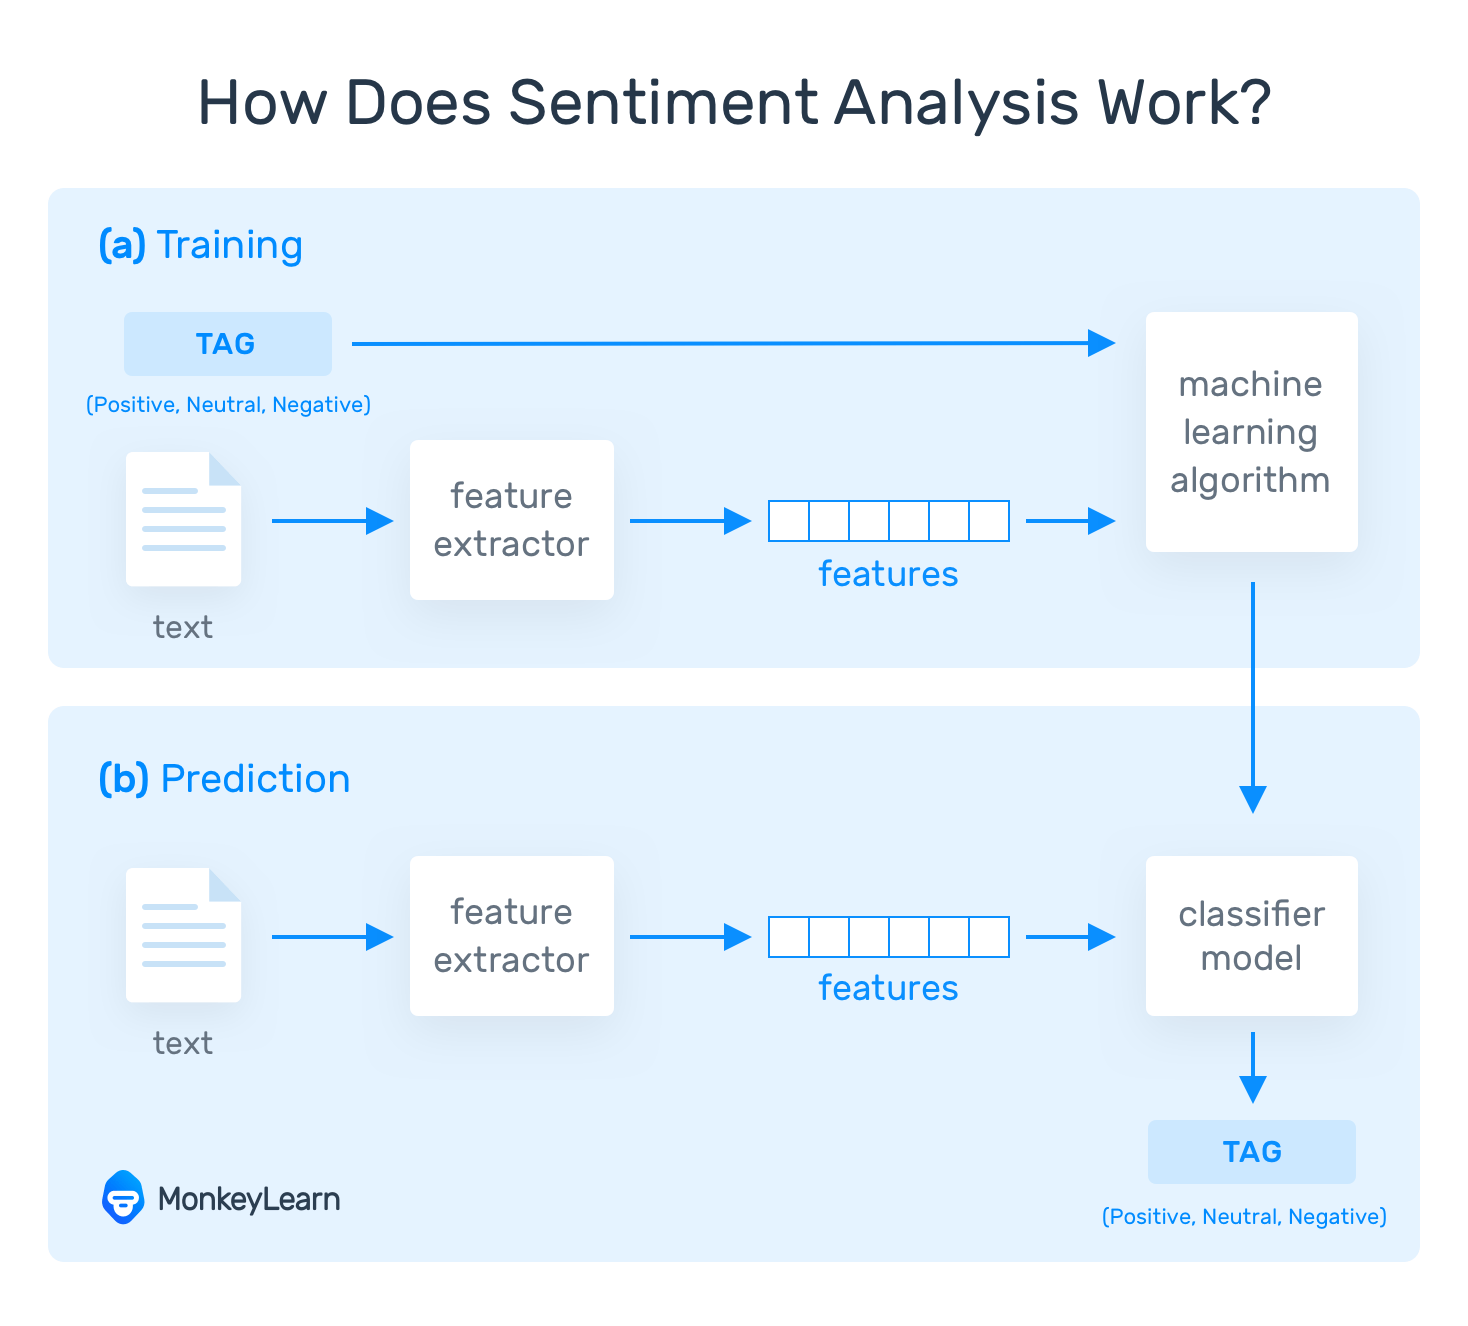

In [ ]:
pip install --upgrade openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.5-py3-none-any.whl size=67620 sha256=f63695e020734f346ea8a27e400755d23d82f3fc509fc9d4b5c981e3b9c7b593
  Stored in directory: /root/.cache/pip/wheels/a7/47/99/8273a59fbd59c303e8ff175416d5c1c9c03a2e83ebf7525a99
Successfully built openai


In [ ]:
import openai
import time
openai.api_key = ""

completion = openai.Completion.create(engine="davinci", prompt="This restaurant was terrible.",max_tokens=120)
print(completion.choices[0]['text'])

 The rice was like a sandpaper... I questioned how fresh it was. Lost tast. Dirty food, stinky bed sheet and no spray. The manager was useless and spineless. So far, this lousy restaurant is ranked zero.



Steer clear! Part of the Part of the Kuching 2016 travel blog


In [ ]:
completion = openai.Completion.create(engine="davinci", prompt="This restaurant was great.",max_tokens=120)
print(completion.choices[0]['text'])

 I ate with a friend we sat outside and it was a nice night. Dinner came with little chocolate cups. Our waiter Nelson was very attentive to what we wanted. They have great brunch omelettes with freshly grilled veggies. They are not stingy with the amount of food. And it's not expensive. Enjoy!


In [ ]:
import numpy as np
good_reviews = []
bad_reviews = []
for i in range(0,350):
  completion = openai.Completion.create(engine="davinci", prompt="This restaurant was great.",max_tokens=120)
  good_reviews.append(completion.choices[0]['text'])
  print('Generating good review number %i'%(i))
  completion = openai.Completion.create(engine="davinci", prompt="This restaurant was terrible.",max_tokens=120)
  bad_reviews.append(completion.choices[0]['text'])
  print('Generating bad review number %i'%(i))
  display = np.random.choice([0,1],p=[0.7,0.3])
  time.sleep(3)
  if display ==1:
    display_good = np.random.choice([0,1],p=[0.5,0.5])
    if display_good ==1:
      print('Printing random good review')
      print(good_reviews[-1])
    if display_good ==0:
      print('Printing random bad review')
      print(bad_reviews[-1])

Generating good review number 0
Generating bad review number 0
Printing random good review
 They price their sandwiches a dollar over the price on their menu (6.99 vs 7) but it's an easy fix as they can do it free of charge. If you order through Netecafe you can click "I'm a dick" right under the selection for toppings when ordering, you'll get the dollar back, then you can pay for your drink or coffee that you'll get with the sandwich. The sandwiches are tasty and the coffee is amazing. There is affordable parking nearby, its easy to get to from the I-15 freeway, and relatively peaceful in general. I did
Generating good review number 1
Generating bad review number 1
Generating good review number 2
Generating bad review number 2
Generating good review number 3
Generating bad review number 3
Generating good review number 4
Generating bad review number 4
Printing random good review
 The ambience was relaxing and the décor was fun and modern. The food was okay but the service was phenomen

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.zeros((700,2)))
df.columns = ['Reviews','Sentiment']
df['Sentiment'].loc[0:349] = 1

In [ ]:
df['Reviews'] = good_reviews+bad_reviews

In [ ]:
df.to_csv('generated_reviews.csv')

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
labeled_data = pd.read_csv('generated_reviews.csv').drop(columns=['Unnamed: 0'])
labeled_data.Sentiment = labeled_data.Sentiment.astype(int)
labeled_data = labeled_data.dropna().reset_index()

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.0 MB/s eta 0:00:00


In [ ]:
dataset = labeled_data
from transformers import AutoTokenizer

#tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
#tokenized_data = tokenizer(dataset["Reviews"].values.tolist(), return_tensors="np", padding=True)
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
tokenized_data = vectorizer.fit_transform(dataset['Reviews']).toarray()

labels = np.array(dataset["Sentiment"])  # Label is already an array of 0 and 1

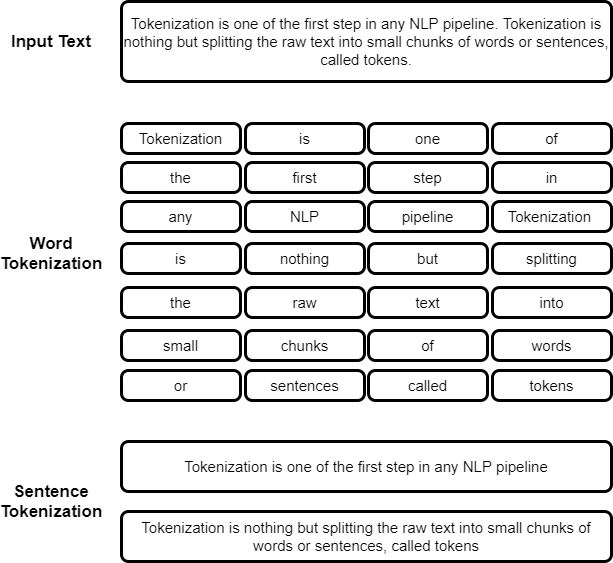

In [ ]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [ ]:
feature_size=tokenized_data[0].size

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
X = tokenized_data
y = labels
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X.shape

(700, 867)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


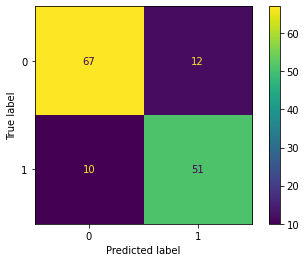

In [ ]:
plot_confusion_matrix(rf,X_test,y_test)

In [ ]:
target_data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
# target_data.drop('url',axis=1)

In [ ]:
target_data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
new_data_processed[0].size

249

In [ ]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13046586, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07288509, 0.12013795,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.43294551, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# vectorizer.get_feature_names_out()

In [ ]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [ ]:
dataset = target_data
new_data_processed = vectorizer.transform(target_data['Review']).toarray()
y_pred = rf.predict(new_data_processed)

In [ ]:
J = np.random.choice(range(0,len(new_data_processed)),5)
for j in J:
    print('Review number %i: \n'%(j))
    print(target_data['Review'].loc[j])
    print('Classified as %i (1=good, 0=bad)' %(y_pred[j]))

Review number 245: 

-Drinks took close to 30 minutes to come out at one point.
Classified as 0 (1=good, 0=bad)
Review number 261: 

I have been in more than a few bars in Vegas, and do not ever recall being charged for tap water.
Classified as 0 (1=good, 0=bad)
Review number 772: 

the food is not tasty at all, not to say its "real traditional Hunan style".
Classified as 0 (1=good, 0=bad)
Review number 84: 

The pan cakes everyone are raving about taste like a sugary disaster tailored to the palate of a six year old.
Classified as 0 (1=good, 0=bad)
Review number 132: 

They have a good selection of food including a massive meatloaf sandwich, a crispy chicken wrap, a delish tuna melt and some tasty burgers.
Classified as 1 (1=good, 0=bad)


Text(0.5, 0, 'Reviews')

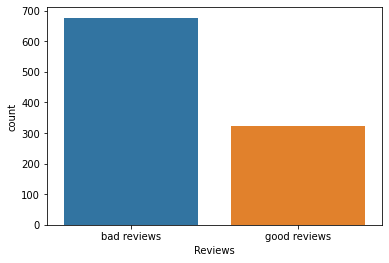

In [ ]:
import seaborn as sns
sns.countplot(x=pd.DataFrame(y_pred)[0])
plt.xticks([0,1],['bad reviews','good reviews'])
plt.xlabel('Reviews')

# Challenges in sentiment analysis
Sentiment analysis is the process of understanding the tone, polarity, sarcasm, emojis, idioms, negations, and comparative sentences of text-based data. It can be difficult to interpret tone, decipher mid-polar phrases, detect sarcasm, understand emojis, and accurately interpret idioms, negations, and comparative sentences. To achieve accurate sentiment analysis, companies need to employ a sentiment analysis API that is smart, precise, and has a massive language dataset. It should be able to decipher subjective statements, detect context, and understand the language of emojis. Additionally, the ML model must be trained to understand idioms and interpret comparative sentences. For multilingual sentiment analysis, a unique part-of-speech tagger, lemmatizer, and grammatical constructs must be used for each language.

# Results:
The results showed that GPT-3 was highly effective in categorizing the sentiment of restaurant reviews. This high accuracy demonstrates the potential of using GPT-3 as a tool for sentiment analysis in the hospitality industry, providing valuable insights into customer satisfaction.

# Conclusion:
In conclusion, the study highlights the effectiveness of OpenAI's GPT-3 for sentiment analysis of restuarant reviews. The results of this study demonstrate the potential of using AI models, such as GPT-3, for sentiment analysis in various industries, including but not limited to the hospitality sector. The insights obtained from sentiment analysis can be used by businesses to make data-driven decisions and improve customer satisfaction.

# Future Work:
Future Prospects of Using ChatGPT for Sentiment Analysis: Sentiment analysis is a valuable tool for understanding customer sentiment, and ChatGPT can be used to help with this task. Here are some potential future prospects of using ChatGPT for sentiment analysis:

* More Accurate Results: ChatGPT can provide more accurate results than traditional sentiment analysis tools, as it can analyze conversations more holistically and more accurately identify contextual cues.

* Faster Analysis: ChatGPT can provide faster analysis of conversations, as it can quickly identify and analyze key words, phrases, and sentiment in conversations.

* Real-Time Analysis: ChatGPT can provide real-time analysis of conversations, allowing for more timely insights into customer sentiment.

* Better Understanding of Customer Needs: ChatGPT can provide a better understanding of customer needs, as it can analyze conversations more accurately and identify customer needs more quickly.

* Future research could also explore the potential of using GPT-3 for sentiment analysis in other industries, such as retail and finance. Additionally, future studies could also investigate the use of other AI models and techniques for sentiment analysis, and compare their performance with GPT-3. Furthermore, the application of GPT-3 for multilingual sentiment analysis could also be a promising direction for future research.

Overall, ChatGPT can provide a powerful tool for sentiment analysis, and its potential future prospects are exciting.

References: https://towardsdatascience.com/hands-on-sentiment-analysis-on-hotels-reviews-using-artificial-intelligence-and-open-ais-chatgpt-d1939850c79e

# License
All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2021 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.